In [20]:
import meanz_modules as mzmod
import rubin_sim
import rubin_sim.maf as maf
from rubin_sim.scheduler.utils import SkyAreaGenerator
from rubin_sim.data import get_baseline

from os import path

opsim_fname = rubin_sim.data.get_baseline()
run_name = path.splitext(path.basename(opsim_fname))[0]
nside=64


In [3]:
# # Apply the above routine to our baseline sim, and show the plots
bgroup, bd = mzmod.metric_plots(run_name, opsim_fname, year=2,nside=nside)
bgroup.plot_all(closefigs=True)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


In [4]:
ilim = [24.1, 25.3]
meanz = [0.92, 1.08]

a,b = mzmod.coeff_solve(ilim,meanz)
print(a,b)

0.044444444444444446 -0.7644444444444444


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Dataset definitions

In [5]:
v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season6v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season4v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season6v3.3_10yrs.db',]
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]
print(v33_name_list)

['baseline_v3.3_10yrs', 'noroll_v3.3_10yrs', 'roll_mid1_const_season6v3.3_10yrs', 'roll_mid1_const_season2v3.3_10yrs', 'roll_mid1_const_season4v3.3_10yrs', 'roll_mid2_const_season2v3.3_10yrs', 'roll_mid2_const_season4v3.3_10yrs', 'roll_mid2_const_season6v3.3_10yrs']


## In this section, we get maps of the i-band depth across the survey for v3.3 simulations at year=3

In [7]:
# # Run our above routine for the v3.3 simulations at year 3
# for i in range(len(v33_sim_list)):
#     this_run = v33_sim_list[i]
#     this_fname = v33_name_list[i]
#     bgroup, bd = mzmod.metric_plots(this_fname, this_run, year=3)
#     #bgroup.plot_all(closefigs=False)

### In this section, we run our metric calculations at each year for all v3.3 simulations and produce a dataframe to save to disk.

In [61]:
import numpy as np
import pandas as pd
import importlib
importlib.reload(mzmod)

v33_sim_list = ['/pscratch/sd/r/rhlozek/rubin_sim_data/sim_baseline/baseline_v3.3_10yrs.db',
           '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/noroll_v3.3_10yrs.db']
#,
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid1_const_season4v3.3_10yrs.db',
#            '/pscratch/sd/r/rhlozek/rubin_sim_data/noroll/roll_mid2_const_season2v3.3_10yrs.db',]
v33_name_list = [path.splitext(path.basename(sim))[0] for sim in v33_sim_list]
nums =len(v33_name_list)
v33_df = mzmod.get_year_by_year_metrics(np.arange(1,10), v33_name_list[:nums], v33_sim_list[:nums])
display(v33_df)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


/opt/lsst/software/stack/conda/miniconda3-py38_4.9.2/envs/lsst-scipipe-7.0.1/lib/python3.11/site-packages/rubin_sim/maf/maps/dust_map.py:44: UserWarning: Slicer value of nside 64 different from map value 128, using slicer value
  warnings.warn(


,Strategy,Year,Median i-band depth,Mean i-band depth,Std i-band depth,IQR i-band depth,Mean z bin,Std z bin,Clbias,Used meanz
0,baseline_v3.3_10yrs,1,25.252161,25.233240,0.184610,0.235948,"[0.37551455702566444, 0.6828697047921608, 0.95...","[0.008629632331525208, 0.015692905567681506, 0...","[-0.002665497968803981, 0.006667618973598436, ...","[0.37551455702566444, 0.6828697047921608, 0.95..."
1,noroll_v3.3_10yrs,1,25.252161,25.233240,0.184610,0.235948,"[0.37551455702566444, 0.6828697047921608, 0.95...","[0.008629632331525208, 0.015692905567681506, 0...","[-0.002665497968803981, 0.006667618973598436, ...","[0.37551455702566444, 0.6828697047921608, 0.95..."
2,baseline_v3.3_10yrs,2,25.635288,25.598740,0.197662,0.260341,"[0.3925998683509861, 0.7139391834121525, 1.000...","[0.009239731794447311, 0.016802365726668097, 0...","[-0.0031698175188096395, 0.00784308370661542, ...","[0.3925998683509861, 0.7139391834121525, 1.000..."
3,noroll_v3.3_10yrs,2,25.626280,25.601309,0.170386,0.215176,"[0.39271996597515474, 0.7141575798168401, 1.00...","[0.007964685997669037, 0.014483706887610205, 0...","[-0.0027343508245137073, 0.006765151172978885,...","[0.39271996597515474, 0.7141575798168401, 1.00..."
4,baseline_v3.3_10yrs,3,25.843019,25.824180,0.217975,0.277805,"[0.403138101980712, 0.7331028625641963, 1.0276...","[0.010189252212638422, 0.018529059713713658, 0...","[-0.0037178776856377285, 0.009148753004025546,...","[0.403138101980712, 0.7331028625641963, 1.0276..."
5,noroll_v3.3_10yrs,3,25.866495,25.839571,0.168145,0.213265,"[0.4038575305264262, 0.7344111366362386, 1.029...","[0.007859940993180074, 0.014293229078013758, 0...","[-0.002879820892219144, 0.007084064504992393, ...","[0.4038575305264262, 0.7344111366362386, 1.029..."
6,baseline_v3.3_10yrs,4,25.994479,25.965053,0.172323,0.220420,"[0.40972322703847297, 0.745077850803881, 1.044...","[0.008055272217394117, 0.014648437079728098, 0...","[-5.327681934346514e-05, 0.006020354949877494,...","[0.40972322703847297, 0.745077850803881, 1.044..."
7,noroll_v3.3_10yrs,4,26.001999,25.975704,0.164686,0.209550,"[0.41022107610446906, 0.7459831846674222, 1.04...","[0.007698276580094664, 0.013999243857005437, 0...","[-5.165689737173743e-05, 0.005768397220627529,...","[0.41022107610446906, 0.7459831846674222, 1.04..."
8,baseline_v3.3_10yrs,5,26.073056,26.048741,0.179762,0.229556,"[0.41363522838237027, 0.75219178860702, 1.0543...","[0.008402979051509333, 0.01528073870086139, 0....","[-6.193464348577642e-05, 0.0064082763397681625...","[0.41363522838237027, 0.75219178860702, 1.0543..."
9,noroll_v3.3_10yrs,5,26.095760,26.066504,0.162930,0.207229,"[0.414465532960368, 0.7537016897052775, 1.0565...","[0.007616174697658168, 0.013849942352780496, 0...","[-5.73587554208721e-05, 0.005833050798198672, ...","[0.414465532960368, 0.7537016897052775, 1.0565..."


(3, 2)


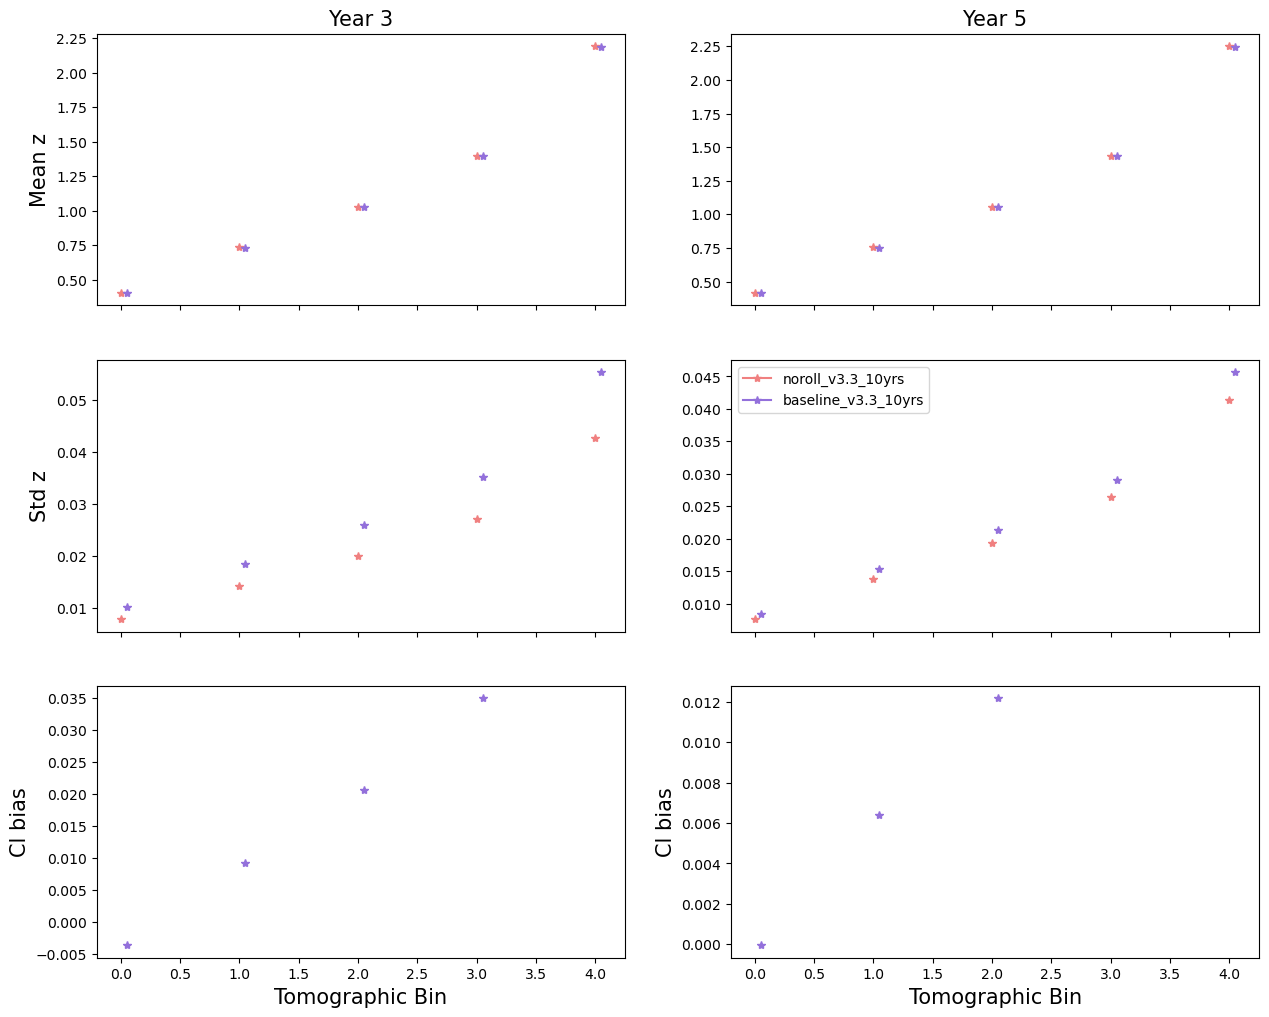

In [65]:
importlib.reload(mzmod)

mzmod.plot_meanz_metrics_by_year(v33_df, years=[3,5],num_bins=5)

In [35]:
v33_df.to_pickle('v33_dataframe_withmeanz.pkl')

In [25]:
vec = mzmod.sensitivity(num_bins=5,fiducial_ilim=24.1)
print(vec)
# import numpy.random as random
# vec = np.linspace(2,18,17)
# print(vec)
# random.shuffle(vec)
# print(vec)

[0.046745091529873814, 0.08500551112138602, 0.11915807457810432, 0.16180047285571472, 0.2539575165815878]


In [11]:
# import matplotlib.pyplot as plt
# fig, axs = plt.subplots(5,1,sharex=True)
# x=np.linspace(0,5,100)
# axs[0].plot(x,x**2)
# axs[3].plot(x,x**2)

### Here we plot the year-by-year metric results.  We read in from the dataframe, so if it was already produced, we can skip over the previous chunk of notebook.

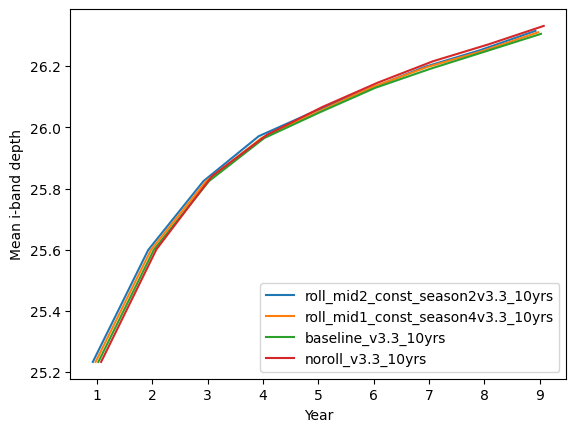

In [12]:
v33_df = pd.read_pickle('v33_dataframe_withmeanz.pkl')
mzmod.plot_metric_by_year(v33_df, 'Mean i-band depth')